# Tổng quan

## Tầm quan trọng của phân tích xu hướng trong ngành điện ảnh

Ngành điện ảnh đang trải qua giai đoạn tăng trưởng nhanh chóng, cùng với sự cạnh tranh gia tăng giữa các nhà sản xuất và nền tảng chiếu phim.
Phân tích xu hướng giúp xác định những thể loại phim đang được ưa chuộng, những yếu tố ảnh hưởng đến sự thành công của phim,
từ đó hỗ trợ các quyết định chiến lược về sản xuất, tiếp thị và phân phối.

## Mục tiêu

1. Xác định xu hướng của các thể loại phim đang phổ biến. Thống kê dữ liệu các thể loại và một số bộ phim dựa theo trích xuất đặc trưng dữ liệu
2. Xây dựng mô hình gợi ý phim dựa theo nội dung (content - based system)




## Nguồn dữ liệu
Được Kaggle tổng hợp từ TMDB.
- **TMDB 5000 Movies Dataset**: Chứa thông tin chi tiết về 5000 phim bao gồm doanh thu, kinh phí, thể loại, đánh giá trung bình, lượt bình chọn.

- **TMDB 5000 Credits Dataset**: Chứa thông tin về đoàn phim, diễn viên, đạo diễn.

- Nguồn dữ liệu:
1. https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata
2. https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv

## Mô tả dữ liệu

Dữ liệu bao gồm:
- `Title`: Tên phim.
- `Budget`: Ngân sách sản xuất.
- `Revenue`: Doanh thu.
- `Popularity`: Độ phổ biến.
- `Genres`: Thể loại phim.
- `Vote Average`: Điểm đánh giá trung bình.
- `Vote Count`: Số lượt bình chọn.



## Sơ lược quy trình phân tích

1. **Làm sạch dữ liệu**:
   - Xóa bỏ các dòng bị `null`, `duplicate`.
   - Chuyển đổi các cột có dạng danh sách string về Python `list`.

2. **Phân tích khám phá dữ liệu (EDA)**:
   - Tổng quan doanh thu, đánh giá trung bình, độ phổ biến.
   - Tìm các phim có kinh phí và doanh thu cao nhất.

3. **Trực quan hóa dữ liệu**:
   - Sử dụng `Matplotlib` và `Seaborn`.

4. **Xây dựng mô hình gợi ý**:
   - Tạo các đặc trưng phim (tags) bằng cách kết hợp `genres`, `cast`, `director`, `keywords`, v.v.
   - Tính mức độ tương đồng phim bằng `cosine similarity`.




# Phân tích dữ liệu

## Kiểm tra dữ liệu

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import os

In [ ]:
movies_df = pd.read_csv('/content/tmdb_5000_movies.csv')
credits = pd.read_csv('/content/tmdb_5000_credits.csv')

In [ ]:
movies = movies_df.copy() #use for recommendation

In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
movies_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [ ]:
movies_df.shape

(4803, 20)

In [ ]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
credits.shape

(4803, 4)

## Khám phá dữ liệu và trích xuất đặc trưng

Những câu hỏi đặt ra:
1. Thể loại phim nào là phổ biến nhất qua các năm?
2. Độ phổ biến (popularity) của phim có phụ thuộc vào kinh phí, ngân sách (budget) mà phim đó bỏ ra hay không?

In [ ]:
tmdb_df = movies_df.copy() #use for EDA

In [ ]:
def extract_genres(genres_str):
  try:
    genres_list = ast.literal_eval(genres_str)
    return [genre['name'] for genre in genres_list]
  except (ValueError, TypeError):
    return []

tmdb_df['genres_list'] = tmdb_df['genres'].apply(extract_genres)

all_genres = set()
for index in tmdb_df.index:
    for genre in tmdb_df.loc[index, 'genres_list']:
      all_genres.add(genre)
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

Có 20 thể loại khác nhau và có phim không có thông tin về thể loại và được ghi là NaN

Tiếp theo, lấy phạm vi năm trong tập dữ liệu

In [ ]:
#convert release_date to dateTime
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

In [ ]:
tmdb_df['release_date'].isnull().sum()

1

In [ ]:
tmdb_df.dropna(subset=['release_date'], inplace=True)

In [ ]:
tmdb_df['release_year'] = tmdb_df['release_date'].dt.year.astype(int)

In [ ]:
min_year = tmdb_df['release_year'].min()
max_year = tmdb_df['release_year'].max()
print(min_year, max_year)

1916 2017


Tiếp theo, data frame được tạo để tạo cấu trúc bảng trong đó các hàng tương ứng với từng thể loại và các cột tương ứng với phạm vi năm

In [ ]:
# creating a dataframe with genre as index and years as columns
genre_df = pd.DataFrame(index=list(all_genres), columns=range(min_year, max_year + 1)) # convert all_genres to a list
genre_df.fillna(0, inplace=True)
genre_df

<ipython-input-546-bd39b3476096>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  genre_df.fillna(0, inplace=True)


,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Horror,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adventure,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TV Movie,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
War,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Documentary,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Foreign,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Thriller,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ở đây, tạo một dãy năm để truy cập các bộ phim khác nhau mỗi năm và phân chia các thể loại cũng như tăng giá trị của thể loại ở vị trí tương ứng trong data frame

In [ ]:
# list of years of each movie
release_year = tmdb_df['release_year']

for index, row in tmdb_df.iterrows():  # iterate through DataFrame rows using iterrows
  for genre in row['genres_list']:
    # check if the release year exists as a column in genre_df
    if row['release_year'] in genre_df.columns:  # access release_year using row['release_year']
      genre_df.loc[genre, row['release_year']] += 1



In [ ]:
genre_df

,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Horror,0,0,0,0,0,0,0,0,0,0,...,21,30,27,24,33,25,21,33,20,0
Adventure,0,0,0,0,0,0,0,0,0,0,...,37,36,30,32,25,36,37,35,23,0
TV Movie,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2,2,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,0,0,...,20,22,21,15,19,21,16,10,13,0
War,0,0,0,0,0,0,0,0,0,1,...,11,4,6,6,2,3,10,2,3,0
Documentary,0,0,0,0,0,0,0,0,0,0,...,8,5,7,7,9,10,7,7,0,0
Comedy,0,0,0,0,0,0,0,0,0,0,...,82,97,87,82,80,71,62,52,26,1
Foreign,0,0,0,0,0,0,0,0,0,0,...,2,4,1,2,1,0,0,0,0,0
Animation,0,0,0,0,0,0,0,0,0,0,...,13,15,13,17,13,17,14,13,4,0
Thriller,0,0,0,0,0,0,0,0,0,0,...,55,59,56,69,58,53,66,67,27,0


Ta sẽ vẽ biểu đồ quạt để miêu tả tỉ lệ tất cả thể loại phim qua các năm trong tập dữ liệu. Top 10 thể loại sẽ được hiển thị, phần còn lại sẽ được label là others.

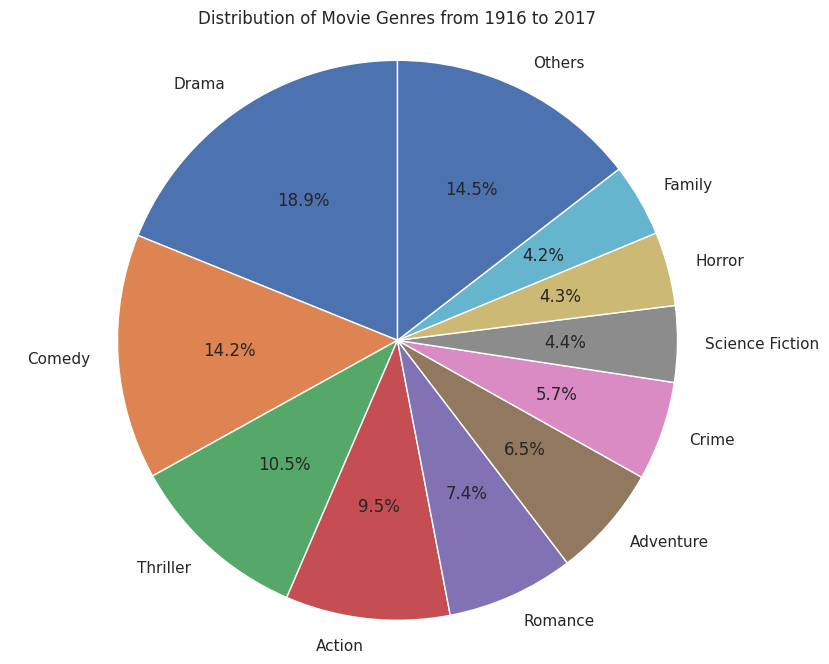

In [ ]:
# calculate total movie counts for each genre across all years
genre_totals = genre_df.sum(axis=1)

# sort genres by total count and select the top 10
top_10_genres = genre_totals.sort_values(ascending=False).head(10)

# calculate the sum of the remaining genres
other_genres_sum = genre_totals.sum() - top_10_genres.sum()

# create a new series including the 'Other' category
top_10_genres_with_other = pd.concat([top_10_genres, pd.Series({'Others': other_genres_sum})])


# create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_10_genres_with_other, labels=top_10_genres_with_other.index, autopct='%1.1f%%', startangle=90)
plt.title(f'Distribution of Movie Genres from {min_year} to {max_year}')
plt.axis('equal')  # equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Biểu đồ trên cho thấy số lượng phim ở mỗi thể loại qua các năm. Ta có thể thấy các phim thể loại Drama, Comedy, Thriller chiếm khá nhiều (Drama chiếm nhiều nhất).

Tiếp theo là tạo 1 bảng riêng dưới dạng dataframe và sẽ lưu giá trị popularity của phim theo thể loại của nó mỗi năm

In [ ]:
# creating a dataframe with genre as index and years as columns to get a count of popularity
popularity_df = pd.DataFrame(index=list(all_genres), columns=range(min_year, max_year + 1), dtype=float) # convert all_genres to a list, and set dtype to float
popularity_df.fillna(0, inplace=True)
popularity_df.head()

,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Horror,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adventure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TV Movie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fantasy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
War,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Tạo 1 array để giữ tất cả giá trị popularity và check null values để xem có giá trị nào không hợp lệ trong từng hàng data trong dataset hay không.

In [ ]:
# list of popularity levels of each movie
popularity = np.array(tmdb_df['popularity'])
# check value zero
print (len(popularity[popularity==0]))
# index to access year value
z = 0
for index, row in tmdb_df.iterrows():  # iterate through DataFrame rows
  for genre in row['genres_list']: # access the genres_list column
    # check if the release year exists as a column in popularity_df
    if row['release_year'] in popularity_df.columns:  # access release_year using row['release_year']
      popularity_df.loc[genre, row['release_year']] += popularity[z]  # increment popularity
  z += 1
popularity_df

0


,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Horror,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,221.468083,537.163153,465.859931,392.260570,513.812656,668.416802,471.761082,521.810230,489.165122,0.00000
Adventure,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,1222.359601,1403.396975,1436.452840,1168.369240,1471.737925,1581.349081,3477.388720,3760.669448,1881.540936,0.00000
TV Movie,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.102003,2.736290,21.910909,0.000000,0.000000,0.000000,0.00000
Fantasy,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,627.661988,844.003758,742.932514,661.315050,1011.610875,864.619287,1152.157119,504.774156,777.747332,0.00000
War,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.785744,...,176.133578,120.157879,85.157210,66.641814,34.254085,38.293037,621.215863,28.486080,70.232358,0.00000
Documentary,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,42.475997,37.900702,45.257610,35.751974,29.826512,33.847570,2.122457,4.280945,0.000000,0.00000
Comedy,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,1448.055061,1583.564940,1448.909734,1619.292729,1775.527511,1753.644371,2179.214885,2432.303319,1300.987680,0.71087
Foreign,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,1.970971,3.012323,0.120820,0.253173,0.126676,0.000000,0.000000,0.000000,0.000000,0.00000
Animation,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,330.476547,586.450811,496.867935,462.974038,542.751379,734.718065,622.945429,1345.772064,200.194481,0.00000
Thriller,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,1410.942727,1246.392973,1492.070528,1723.721724,1665.595215,1815.277915,2436.053306,2817.272682,777.669346,0.00000


Trong kết quả trên, những giá trị 0 chỉ ra rằng trong năm đó không có phim ở thể loại đó nên popularity của nó cũng bằng 0

Ta sử dụng một hàm để chuẩn hóa dữ liệu của các giá trị trong dataframe popularity_df để dữ liệu không chứa giá trị quá khác biệt (outliers) và được mô tả là độ lệch chuẩn so với giá trị trung bình. Giá trị dương biểu thị bộ phim phổ biến và giá trị âm biểu thị bộ phim không phổ biến hoặc ít phổ biến hơn. Giá trị trung bình đóng vai trò là đường phân cách để xác định các bộ phim phổ biến.

Những hàng thể loại chắc chắn sẽ có phim thuộc thể loại đó trong suốt từ 1916 - 2017. Nhưng với cột năm, chẳng hạn như những năm 1917 - 1924 thì dataset cho thấy không có bất kì phim nào được ra mắt. Do đó khi chuẩn hoá, độ lệch chuẩn của cột sẽ bằng 0 và vì vậy sẽ khiến cho kết quả ra NaN.

$$p_{std} = \frac{p - mean}{std(p)}$$

Vậy nên chúng ta sẽ loại bỏ các cột có giá trị độ lệch chuẩn bằng 0.

In [ ]:
popularity_df = popularity_df.loc[:, popularity_df.std(ddof=0) > 0]


In [ ]:
def standardize(p):
    p_std = (p - p.mean()) / p.std(ddof = 0)
    return p_std

In [ ]:
popularity_std = standardize(popularity_df)
popularity_std

,1916,1925,1927,1929,1930,1932,1933,1934,1935,1936,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Horror,-0.229416,-0.420084,-0.333333,-0.463253,-0.420084,-0.420084,-0.415514,-0.333333,-0.420084,-0.386381,...,-0.704806,-0.265948,-0.340320,-0.424638,-0.317008,-0.237128,-0.601328,-0.571008,-0.036058,-0.420084
Adventure,-0.229416,-0.420084,-0.333333,-0.463253,-0.420084,-0.420084,-0.415514,-0.333333,-0.420084,-0.051166,...,0.983453,1.285272,1.279604,0.805505,1.103570,0.888955,1.722793,2.145603,2.337879,-0.420084
TV Movie,-0.229416,-0.420084,-0.333333,-0.463253,-0.420084,-0.420084,-0.415514,-0.333333,-0.420084,-0.386381,...,-1.078368,-1.227880,-1.117842,-1.046215,-1.074921,-1.034580,-0.966120,-1.008680,-0.870062,-0.420084
Fantasy,-0.229416,-0.420084,-0.333333,-0.463253,-0.420084,-0.420084,-0.415514,-0.333333,-0.420084,-0.386381,...,-0.019656,0.283531,0.122115,0.001817,0.421214,0.004884,-0.075207,-0.585297,0.455961,-0.420084
War,-0.229416,2.380476,-0.333333,-0.463253,-0.420084,2.380476,-0.415514,-0.333333,-0.420084,-0.051166,...,-0.781274,-1.012705,-0.975715,-0.940749,-1.028181,-1.014373,-0.485761,-0.984787,-0.750319,-0.420084
Documentary,-0.229416,-0.420084,-0.333333,-0.463253,-0.420084,-0.420084,-0.415514,-0.333333,-0.420084,-0.386381,...,-1.006721,-1.160008,-1.042307,-0.989709,-1.034747,-1.019857,-0.964479,-1.005089,-0.870062,-0.420084
Comedy,-0.229416,-0.420084,-0.333333,-0.463253,-0.420084,-0.420084,2.891746,3.000000,2.380476,2.807002,...,1.364146,1.607910,1.300395,1.520225,1.554082,1.101478,0.718972,1.031429,1.348062,2.380476
Foreign,-0.229416,-0.420084,-0.333333,-0.463253,-0.420084,-0.420084,-0.415514,-0.333333,-0.420084,-0.386381,...,-1.075043,-1.222485,-1.117641,-1.045976,-1.078791,-1.061607,-0.966120,-1.008680,-0.870062,-0.420084
Animation,-0.229416,-0.420084,-0.333333,-0.463253,-0.420084,-0.420084,-0.415514,-0.333333,-0.420084,-0.386381,...,-0.520935,-0.177685,-0.288568,-0.312556,-0.274093,-0.155347,-0.484424,0.120094,-0.528740,-0.420084
Thriller,-0.229416,-0.420084,-0.333333,1.553800,-0.420084,-0.420084,-0.415514,-0.333333,-0.420084,-0.386381,...,1.301547,1.004115,1.372430,1.685746,1.391056,1.177502,0.917574,1.354324,0.455828,-0.420084


In [ ]:
# creating a series to hold the popular genre for every year.
pop_genre = pd.Series(index = range(min_year, max_year + 1))
pop_genre = pop_genre.fillna(0)
pop_genre.head()


,0
1916,0.0
1917,0.0
1918,0.0
1919,0.0
1920,0.0


In [ ]:
# to identify the genre with maximum standardized popularity value
for i in range(min_year, max_year + 1):
    # check if the year exists as a column in popularity_std before accessing it
    if i in popularity_std.columns:
        pop_genre[i] = popularity_std[i].argmax()
    else:
        # Handle cases where the year is not in the columns (e.g., set to NaN)
        pop_genre[i] = np.nan  # or any other appropriate value

pop_genre.dropna()

,0
1916,16.0
1925,4.0
1927,16.0
1929,16.0
1930,11.0
...,...
2013,16.0
2014,11.0
2015,1.0
2016,11.0


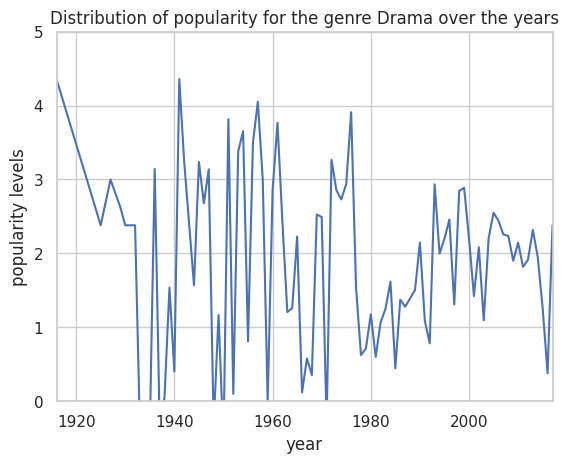

In [ ]:
# to plot a histogram of genre 'Drama'.
plt.plot(popularity_std.loc['Drama'])
plt.xlabel('year')
plt.ylabel('popularity levels')
plt.title('Distribution of popularity for the genre Drama over the years')
plt.axis([min_year, max_year, 0, 5])
plt.show()


Từ biểu đồ trên, chúng ta có thể thấy sự gia tăng và giảm sút của thể loại Kịch qua các năm. Có sự gia tăng và giảm mạnh về mức độ phổ biến của thể loại này. Giá trị trung bình của phân phối trên nằm trong khoảng từ năm 1930 đến năm 1980 vì có sự gia tăng và giảm mạnh ở cả hai đầu nên giá trị trung bình gần như phải nằm ở giữa.

Câu hỏi tiếp theo được đặt ra là liệu sự nổi tiếng của một bộ phim có phụ thuộc vào ngân sách được bỏ ra cho bộ phim đó hay không.

Tiếp theo, ta chuẩn hóa dữ liệu popularity có sẵn trong mảng và đưa nó vào một Series mới với id của tập dữ liệu làm index dữ liệu.



In [ ]:
# standardizing popularity data
std_pop = pd.Series(((popularity - popularity.mean()) / popularity.std(ddof = 0)), index = tmdb_df['id'])
std_pop.head()

,0
id,
19995,4.052813
285,3.695909
206647,2.699344
49026,2.854496
49529,0.705017


Sau đó ta đưa thông tin về budget vào series này.

In [ ]:
budget = pd.Series(np.array(tmdb_df['budget']), index = tmdb_df['id'])
budget.head()

,0
id,
19995,237000000
285,300000000
206647,245000000
49026,250000000
49529,260000000


Trong mảng ngân sách ở trên có các giá trị ngân sách bằng 0. Một bộ phim không thể được tạo ra với ngân sách bằng 0. Do đó, cần loại bỏ dữ liệu không đầy đủ. Ta loại bỏ dữ liệu khỏi dữ liệu popularity được chuẩn hóa và dữ liệu budget có sẵn bằng cách sử dụng một mảng boolean để biểu thị budget bằng 0 hay không.

In [ ]:
# remove incomplete data from the dataset.
boolean = budget != 0
std_pop = std_pop[boolean]
budget = budget[boolean]
budget.head()

,0
id,
19995,237000000
285,300000000
206647,245000000
49026,250000000
49529,260000000


In [ ]:
print (budget.head(), std_pop.head())

id
19995     237000000
285       300000000
206647    245000000
49026     250000000
49529     260000000
dtype: int64 id
19995     4.052813
285       3.695909
206647    2.699344
49026     2.854496
49529     0.705017
dtype: float64


In [ ]:
print (len(std_pop), len(budget))

3766 3766


Tức có khoảng 3766 dòng dữ liệu trong tổng số 4803 dòng dữ liệu trong tập dữ liệu có đầy đủ thông tin chi tiết về ngân sách.

Sau đó ta chuẩn hoá tập dữ liệu này.

In [ ]:
# standardizing the budget values
std_budget = standardize(budget)
std_budget.head()

,0
id,
19995,4.689333
285,6.166790
206647,4.876947
49026,4.994205
49529,5.228722


Tiếp theo, ta sẽ tính hệ số tương quan để xác định chi tiết về mối quan hệ giữa kinh phí của một bộ phim và mức độ phổ biến tương ứng của nó

In [ ]:
# co relation coefficient(Pearson's value)
(std_pop * std_budget).mean()

0.49282051494029055

Giá trị hệ số Pearson là giá trị dương và gần bằng 0.5 (lớn hơn 0.3 và bé hơn 0.7) biểu thị rằng có mối quan hệ tương quan giữa mức độ phổ biến của bộ phim và tỷ lệ kinh phí của nó nhưng không quá chặt chẽ. Do đó, kinh phí cũng là một trong những yếu tố ảnh hưởng mức độ phổ biến của bộ phim nhưng không hẳn là quá lớn.

Kết luận:
- Do đó, thể loại phổ biến nhất trong hầu hết các năm là Drama.
- Dataset đưa ra danh sách các thể loại phổ biến nhất từ ​​năm 1916 đến năm 2017.
- Ta cũng đã vẽ biểu đồ cho thấy sự phân bố mức độ phổ biến của thể loại kịch qua các năm trong tập dữ liệu đã cho và sự phân bố các thể loại trong bộ phim.
- Ngân sách của bộ phim có đóng vai trò quan trọng trong mức độ phổ biến của bộ phim nhưng không hẳn là một yếu tố quyết định, điều này được chứng minh từ hệ số Pearson được tính toán từ tập dữ liệu ngân sách đã được làm sạch và mức độ phổ biến.
- Gần một nửa tập dữ liệu đã bị xóa do không có thông tin chi tiết về ngân sách nên cũng vì thế mà chúng ta không thể hoàn toàn dựa vào dữ liệu còn lại sau khi làm sạch để xác định xem mối quan hệ đã nêu ở trên có đúng hay không. Từ tập dữ liệu đã được làm sạch, chúng ta đã phần nào hiểu được mối quan hệ của popularity và budget. Do đó, mối quan hệ đã nêu ở trên là đúng một phần.

## Top 10 phim có kinh phí cao nhất

<ipython-input-565-fdb07a49ed84>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


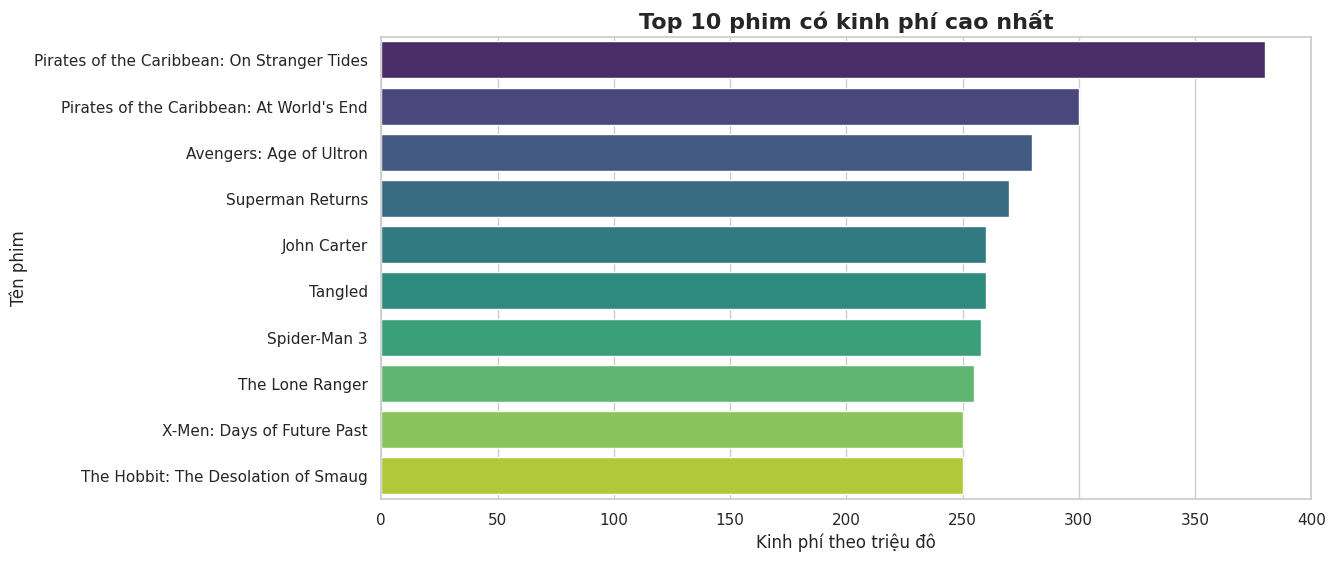

In [ ]:
top_10_budget = tmdb_df.sort_values('budget', ascending=False).head(10) # sort top 10 values
plt.figure(figsize=(12, 6))

# plot
sns.barplot(
    x='budget',
    y='title',
    data=top_10_budget,
    palette='viridis'
)

# set x value million dolars
plt.gca().set_xticks(plt.gca().get_xticks())  # set ticks
plt.gca().set_xticklabels([f'{x / 1e6:.0f}' for x in plt.gca().get_xticks()])  # label

# title label
plt.title('Top 10 phim có kinh phí cao nhất', fontsize=16, weight='bold')
plt.xlabel('Kinh phí theo triệu đô', fontsize=12)
plt.ylabel('Tên phim', fontsize=12)

plt.show()


## Phim có doanh thu cao nhất

<ipython-input-566-e215db8b90fd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


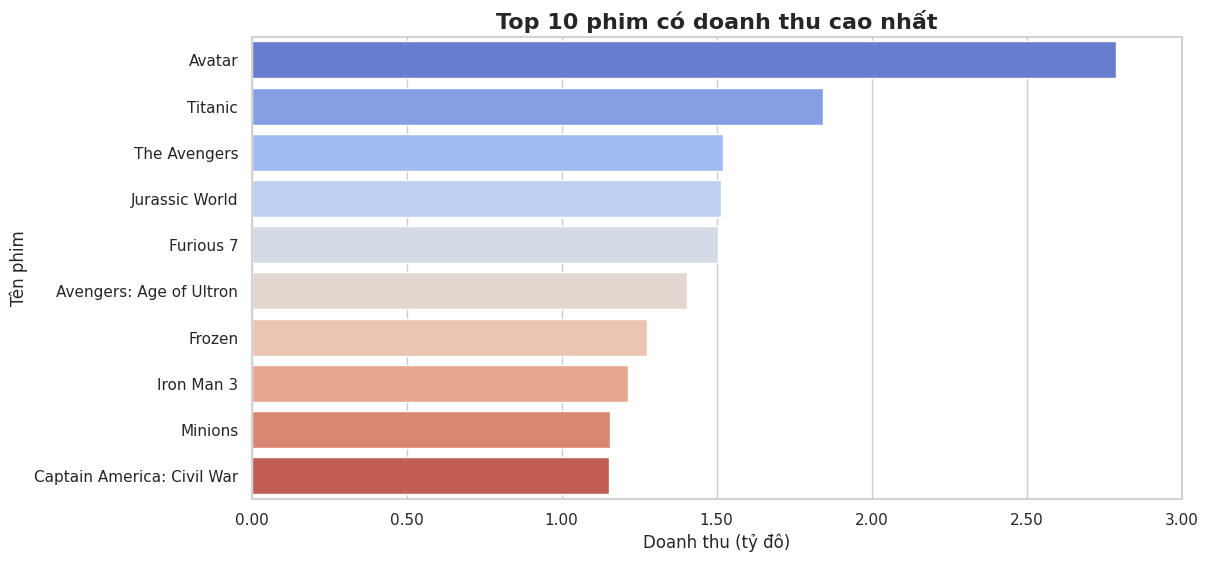

In [ ]:
# sort top 10 revenue
top_10_revenue = tmdb_df.sort_values('revenue', ascending=False).head(10)

# plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='revenue',
    y='title',
    data=top_10_revenue,
    palette='coolwarm'
)

# set x value billion
plt.gca().set_xticks(plt.gca().get_xticks())
plt.gca().set_xticklabels([f'{x / 1e9:.2f}' for x in plt.gca().get_xticks()])


plt.title('Top 10 phim có doanh thu cao nhất', fontsize=16, weight='bold')
plt.xlabel('Doanh thu (tỷ đô)', fontsize=12)
plt.ylabel('Tên phim', fontsize=12)


plt.show()


## Top 10 phim có độ phổ biến cao nhất

<ipython-input-567-39ab220a9ad5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


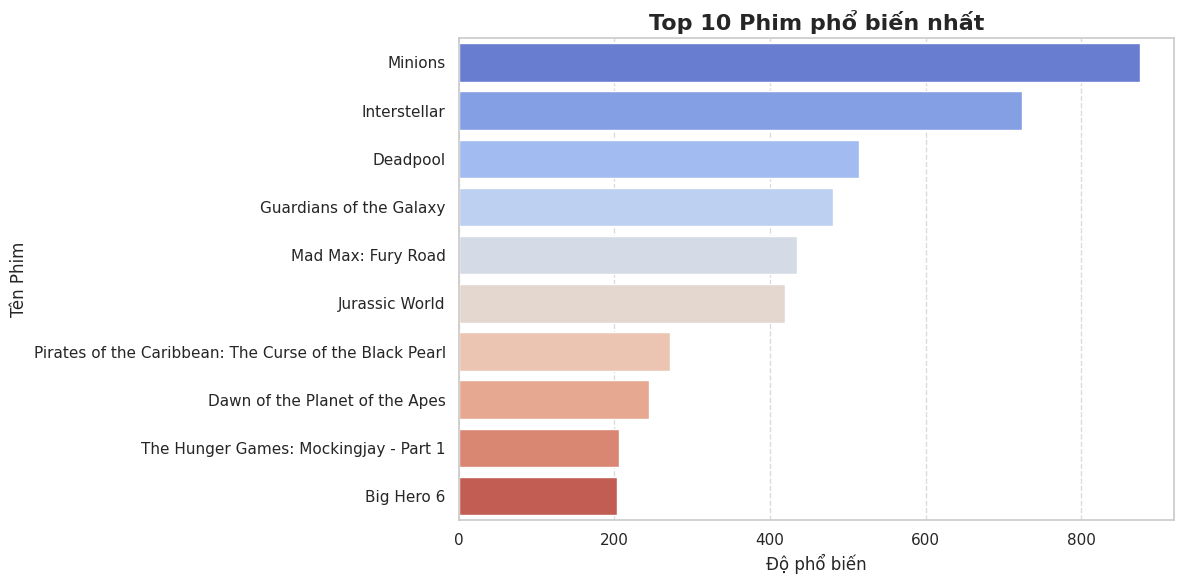

In [ ]:
top_popularity = tmdb_df.sort_values('popularity', ascending=False)[:10] # sort top 10 popularity

# plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='popularity',
    y='title',
    data=top_popularity,
    palette='coolwarm'
)

plt.title('Top 10 Phim phổ biến nhất', fontsize=16, weight='bold')
plt.xlabel('Độ phổ biến', fontsize=12)
plt.ylabel('Tên Phim', fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Top 10 có lượt đánh giá cao nhất

### Công thức Xếp hạng Trọng số

Công thức cho Xếp hạng Trọng số (WR) là:

$$ WR = \frac{v}{v+m} \cdot R + \frac{m}{v+m} \cdot C $$

Trong đó:
- **WR**: Điểm xếp hạng (tính theo trọng số)
- **R**: Điểm xếp hạng trung bình phim  
- **v**: lượt đánh giá của phim
- **m**: lượt đánh giá tối thiểu
- **C**: Điểm trung bình đánh giá của phim  


In [ ]:
C = tmdb_df['vote_average'].mean() # Điểm trung bình của tất cả các phim
m = tmdb_df['vote_count'].quantile(0.70) # Lấy ngưỡng 70% của số lượt bình chọn
qualified_movies = tmdb_df[tmdb_df['vote_count']>m] # Lọc các phim có số lượt bình chọn lớn hơn ngưỡng m
m # In ra ngưỡng m

581.0

In [ ]:
tmdb_df['weighted_rating'] = ((tmdb_df['vote_count']/(tmdb_df['vote_count'] + m) * tmdb_df['vote_average']) + (m/(tmdb_df['vote_count'] + m) * C)) # weighted rating

<ipython-input-570-8ec91db3a08f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weighted_rating", y="title", data=top_movies, palette="coolwarm")


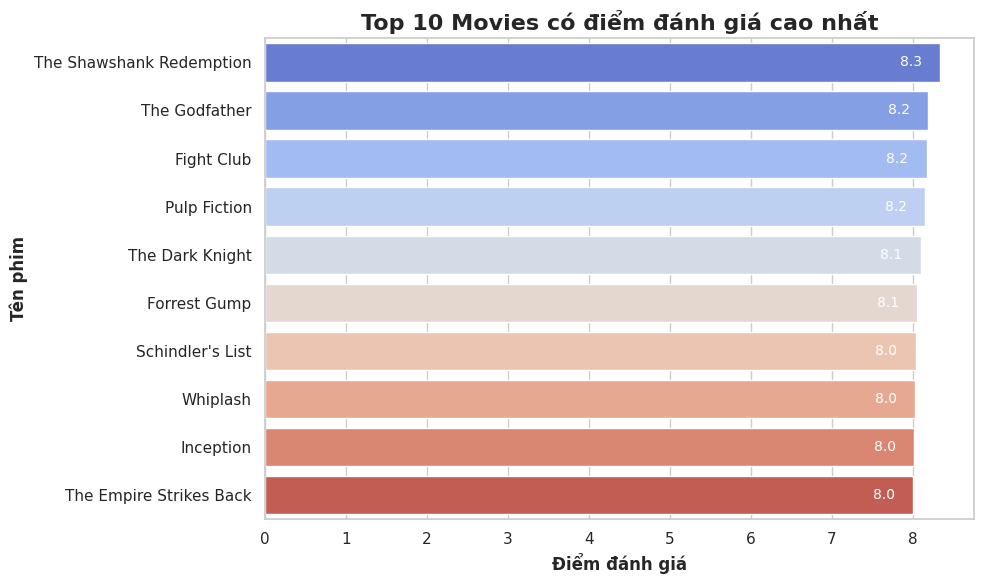

In [ ]:
top_rating = tmdb_df.sort_values('weighted_rating', ascending=False)[:10] # sort top 10 weighted_rating
top_movies = top_rating[['title', 'weighted_rating']] # title and weighted_rating

# plot
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")


sns.barplot(x="weighted_rating", y="title", data=top_movies, palette="coolwarm")


plt.xlabel("Điểm đánh giá", fontsize=12, fontweight='bold')
plt.ylabel("Tên phim", fontsize=12, fontweight='bold')
plt.title("Top 10 Movies có điểm đánh giá cao nhất", fontsize=16, fontweight='bold')

for index, value in enumerate(top_movies['weighted_rating']):
    plt.text(value - 0.5, index, f"{value:.1f}", color='white', va='center', fontsize=10)

plt.tight_layout()
plt.show()

## Đạo diễn nào có số lượng phim chất lượng nhất

In [ ]:
tmdb_df = tmdb_df.merge(credits,on='title')

In [ ]:
tmdb_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,genres_list,release_year,weighted_rating,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]",2009,7.148073,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]",2007,6.807772,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [ ]:
tmdb_df.shape

(4808, 26)

In [ ]:
def fetch_director(text): # get director from crew
    name = ''
    for i in ast.literal_eval(text):
        if i['job'] == "Director":
            name = i['name']
    return name

In [ ]:
tmdb_df['director'] = tmdb_df['crew'].apply(fetch_director) # add director column to dataframe

In [ ]:
tmdb_df['director'].isnull().sum() # check null

0

In [ ]:
tmdb_df['weighted_rating'].describe() #weighted rating

,weighted_rating
count,4808.000000
mean,6.220478
std,0.399523
min,4.678896
25%,6.039006
50%,6.101962
75%,6.319926
max,8.340859


In [ ]:
rating_7above = tmdb_df[tmdb_df['weighted_rating']>7.5] # weighted rating > 7.5

In [ ]:
top5_director_rating = rating_7above['director'].value_counts()[:5] # the top 5 directors have films with a weighted rating > 7.5.
type(top5_director_rating)

pandas.core.series.Series

In [ ]:
tmdb_df[tmdb_df['director']==''].shape # check null

(29, 27)

In [ ]:
tmdb_df = tmdb_df.drop(tmdb_df[tmdb_df['director']==''].index, axis=0) # drop null
tmdb_df.shape

(4779, 27)

In [ ]:
top5_director = tmdb_df['director'].value_counts()[0:5] # the top 5 director with most movies
top5_director

,count
director,
Steven Spielberg,26
Woody Allen,22
Martin Scorsese,20
Clint Eastwood,20
Ridley Scott,16


<ipython-input-583-85f310561e5e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top5_director.index, x=top5_director.values, palette='viridis')


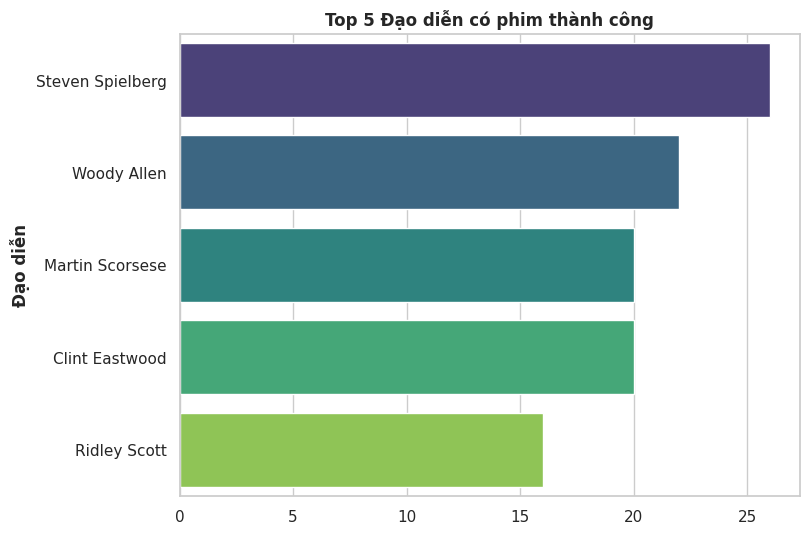

In [ ]:
# plot
plt.figure(figsize=(8,6))

sns.barplot(y=top5_director.index, x=top5_director.values, palette='viridis')
plt.ylabel('Đạo diễn', fontweight='bold')
plt.title('Top 5 Đạo diễn có phim thành công', fontweight='bold')
plt.show()

# Xây dựng Movies Recomendation System

In [ ]:
movies = movies.merge(credits,on='title')

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
movies.shape

(4809, 23)

In [ ]:
# keeping important columns for recommendation
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [ ]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [ ]:
movies.shape

(4809, 7)

In [ ]:
movies.isnull().sum()

,0
movie_id,0
title,0
overview,3
genres,0
keywords,0
cast,0
crew,0


In [ ]:
movies.dropna(inplace=True)

In [ ]:
movies.isnull().sum()

,0
movie_id,0
title,0
overview,0
genres,0
keywords,0
cast,0
crew,0


In [ ]:
movies.shape

(4806, 7)

In [ ]:
movies.duplicated().sum()

0

In [ ]:
# handle genres

movies.iloc[0]['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [ ]:
import ast #for converting str to list

def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name'])
    return L

In [ ]:
movies['genres'] = movies['genres'].apply(convert)

In [ ]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
# handle keywords
movies.iloc[0]['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [ ]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
# handle cast
movies.iloc[0]['cast']

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [ ]:
# top 3 cast

def convert_cast(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L

In [ ]:
movies['cast'] = movies['cast'].apply(convert_cast)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
# handle crew

movies.iloc[0]['crew']

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [ ]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
            break
    return L

In [ ]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [ ]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [ ]:
# handle overview (converting to list)

movies.iloc[0]['overview']

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [ ]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())
movies.sample(4)

,movie_id,title,overview,genres,keywords,cast,crew
1568,2755,About Schmidt,"[66-year-old, Warren, Schmidt, is, a, retired,...","[Drama, Comedy]","[wife husband relationship, channel surfing, m...","[Jack Nicholson, Kathy Bates, Hope Davis]",[Alexander Payne]
1408,2447,The Nativity Story,"[Mary, and, Joseph, make, the, hard, journey, ...","[Drama, History]","[jesus christ, bible, three kings, archangel g...","[Keisha Castle-Hughes, Oscar Isaac, Hiam Abbass]",[Catherine Hardwicke]
3633,3028,Jekyll and Hyde ... Together Again,"[Dr., Jekyll, (Mark, Blankfield), inhales, whi...","[Comedy, Horror, Science Fiction]","[double life, musical, jekyll and hyde]","[Mark Blankfield, Bess Armstrong, Krista Erric...",[Jerry Belson]
1669,17186,Supercross,"[Faced, with, the, suspicious, death, of, thei...","[Action, Adventure, Drama, Romance]",[sport],"[Steve Howey, Mike Vogel, Cameron Richardson]",[Steve Boyum]


In [ ]:
movies.iloc[0]['overview']

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.']

In [ ]:
# removing space
'Anna Kendrick'
'AnnaKendrick'

def remove_space(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [ ]:

movies['cast'] = movies['cast'].apply(remove_space)
movies['crew'] = movies['crew'].apply(remove_space)
movies['genres'] = movies['genres'].apply(remove_space)
movies['keywords'] = movies['keywords'].apply(remove_space)

In [ ]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [ ]:
# Concatinate all
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [ ]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [ ]:
movies.iloc[0]['tags']

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'cultureclash',
 'future',
 'spacewar',
 'spacecolony',
 'society',
 'spacetravel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alienplanet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'loveaffair',
 'antiwar',
 'powerrelations',
 'mindandsoul',
 '3d',
 'SamWorthington',
 'ZoeSaldana',
 'SigourneyWeaver',
 'JamesCameron']

In [ ]:
new_df = movies[['movie_id','title','tags']]

In [ ]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [ ]:
# converting list to str
new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))
new_df.head()

<ipython-input-619-a641d7570f8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))


,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [ ]:
new_df.iloc[0]['tags']

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [ ]:
# converting to lower case
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

<ipython-input-621-9c6ff5dce70f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())


In [ ]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [ ]:
new_df.iloc[0]['tags']

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')


In [ ]:
vector = cv.fit_transform(new_df['tags']).toarray()

In [ ]:
vector[0]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
vector.shape

(4806, 5000)

In [ ]:
len(cv.get_feature_names_out())

5000

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity = cosine_similarity(vector)

In [ ]:
similarity.shape

(4806, 4806)

In [ ]:
new_df[new_df['title'] == 'The Lego Movie'].index[0]

744

In [ ]:
def recommend(movie):
    index = new_df[new_df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new_df.iloc[i[0]].title)

In [ ]:
recommend('Spider-Man 2')

Spider-Man 3
Spider-Man
The Amazing Spider-Man 2
The Amazing Spider-Man
Hellboy II: The Golden Army


In [ ]:
import pickle

In [ ]:
# create the 'artifacts' directory if it doesn't exist
os.makedirs('artifacts', exist_ok=True)

In [ ]:
pickle.dump(new_df,open('artifacts/movie_list.pkl','wb'))
pickle.dump(similarity,open('artifacts/similarity.pkl','wb'))

# Kết Luận
### Kết quả đạt được
- Phân tích chi tiết về xu hướng, thể loại và yếu tố ảnh hưởng đến sự thành công của phim.
- Xây dựng mô hình gợi ý dựa trên nội dung hiệu quả.

### Chiến lược đề xuất
- Tập trung đầu tư tài chính vào các thể loại đang được ưa chuộng.
- Tối ưu hóa chiến lược marketing bằng các phim có tiềm năng doanh thu cao.

### Hướng phát triển
1. Về thống kê và phân tích nghiên cứu:
- Mở rộng dữ liệu để đạt được kết quả chính xác hơn về mối quan hệ giữa các biến.
- Tìm hiểu thêm nhiều mối quan hệ khác từ các biến khác nhau có thể tương quan.
2. Về hệ thống gợi ý phim:
- Hybrid Methods: Kết hợp Collaborative Filtering (Lọc cộng tác: gợi ý dựa trên những người dùng có sở thích tương tự và gợi ý dựa trên những phim tương tự mà người dùng đã xem) và Content-based Filtering để tận dụng ưu điểm của cả hai. Tích hợp thời gian thực để gợi ý thay đổi theo thời gian thực dựa trên hành vi của người dùng (như tìm kiếm hoặc bấm vào phim cụ thể).
 Có thể lấy ví dụ như:
  + Netflix sử dụng thuật toán hybrid kết hợp deep learning.
  + Phân tích hành vi và lịch sử tìm kiếm như Youtube.
  + IMDB: Gợi ý dựa trên xếp hạng và đánh giá cộng đồng.
- Còn một số hướng như:
  + Học tăng cường (Reinforcement Learning): Xây dựng gợi ý tối ưu dựa trên phản hồi liên tục từ người dùng (click, không click).
  + Hệ thống gợi ý theo nhóm (Group Recommendations): Phục vụ các nhóm người dùng (gia đình, bạn bè) với sở thích khác nhau.
  + Tận dụng dữ liệu ngữ cảnh (Context-aware Recommendations): Sử dụng thông tin về thời gian, vị trí, và trạng thái cảm xúc để cải thiện gợi ý.
  + Đa phương thức (Multimodal Recommendations): Kết hợp dữ liệu từ nhiều nguồn như hình ảnh phim, trailer, mô tả, và đánh giá cảm xúc.



In [ ]:
# !apt-get install texlive texlive-xetex texlive-latex-extra pandoc
# !pip install pypandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-fre

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# cp "drive/My Drive/Colab Notebooks/Chỉnh sửa Project_ck_skibidi_dop_yes.ipynb" .


In [ ]:
# !jupyter nbconvert --to PDF "Chỉnh sửa Project_ck_skibidi_dop_yes.ipynb"